# Math 123 Final Project
## Breast Cancer Analysis
### Erick Giron

## Outline

 * [Introduction](#introduction)
 * [Questions](#Questions)
 * [Decision Theory](#decisiontheory)
 * [Logistic Regression](#logisticregression)
 * [Optimization](#optimization)

In [72]:
# Import necessary packages
from IPython.display import HTML, Image
import numpy as np
# Import plotting packages
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import metrics
import pandas as pd
import base64
import requests, io
from PIL import Image
# Import regression analysis packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Introduction <a id='introduction'></a>

In [10]:
#Upload and clean our dataset
bc = pd.read_csv("breast-cancer.data", names=['Class', 'Age', 'Menopause', 'Tumor_Size', 'Invasive_nodes',
                                              'Node caps', 'Degree_malignancy', 'Breast', 'Breast_Quadrant', 'irradiate'])

#storing it 
df = pd.DataFrame(bc)
#changing it to a string to look at full dataset
df_s = df.to_string()
print(df.to_string())

                    Class    Age Menopause Tumor_Size Invasive_nodes Node caps  Degree_malignancy Breast Breast_Quadrant irradiate
0    no-recurrence-events  30-39   premeno      30-34            0-2        no                  3   left        left_low        no
1    no-recurrence-events  40-49   premeno      20-24            0-2        no                  2  right        right_up        no
2    no-recurrence-events  40-49   premeno      20-24            0-2        no                  2   left        left_low        no
3    no-recurrence-events  60-69      ge40      15-19            0-2        no                  2  right         left_up        no
4    no-recurrence-events  40-49   premeno        0-4            0-2        no                  2  right       right_low        no
5    no-recurrence-events  60-69      ge40      15-19            0-2        no                  2   left        left_low        no
6    no-recurrence-events  50-59   premeno      25-29            0-2        no     

In [11]:
#filtering and saving dataset by Age
twenties = df.loc[df['Age'] == '20-29']
thirties = df.loc[df['Age'] == '30-39']
fortys = df.loc[df['Age'] == '40-49']
fiftys = df.loc[df['Age'] == '50-59']
print(len(twenties), len(thirties), len(fortys), len(fiftys))

1 36 90 96


## Decision Theory <a id='decisiontheory'></a>

We want to use decision theory to determine if the person should get checked if they have breast cancer based on Age and menopause.

In [70]:
graph = """
graph LR;
    Age --> 20-29 & 30-39 & 40-49 & 50-59;
    20-29 --> Menopause_N1 & Menopause_Y;
    30-39 --> Menopause_Y & Menopause_N1;
    40-49 --> Menopause_Y & Menopause_N2;
    50-59 --> Menopause_Y & Menopause_N2;
    Menopause_Y --> see_doctor;
    Menopause_N1 --> No_need;
    Menopause_N2 --> Check_daily_for_symptoms!;
"""

graphbytes = graph.encode("ascii")
base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")
img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))

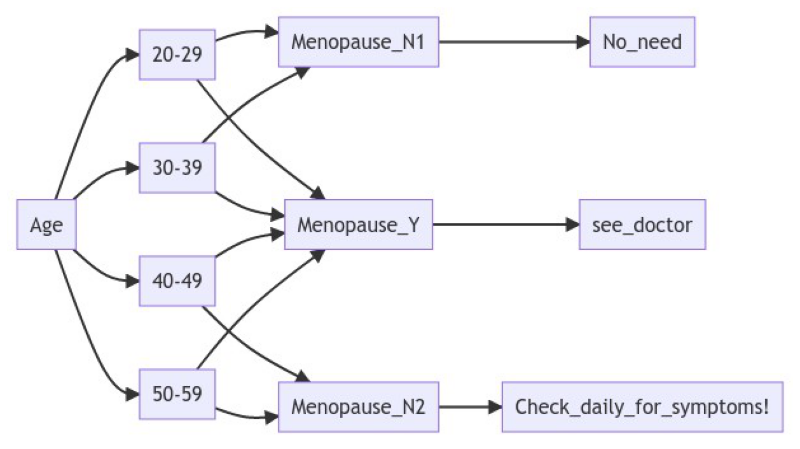

In [71]:
plt.figure(figsize = (60,8))
plt.axis('off')
plt.imshow(img);

The earliest a women can experience menopause is at age 40 but there are some who won't receive it until age 55 so we let them map to two options.

## Logistic Regression <a id='logisticregression'></a>

In this case, I want to find out the relationship between a recurrence event compared to deree of malignancy, tumor size, menopause, and Age.
In order to do so, we'll use logistic regression since we will be working with qualitative variables.

### Recurrence vs Menopause

Before we begin to train our model, we need to convert our dataset into binary.

In [14]:
# checking the length of our dataframe
len(df)

286

In [15]:
# converting the Class column to binary
for i in range(len(df)):
    if bc.Class[i] == 'recurrence-events':
        bc.Class[i] = 1
    else:
        bc.Class[i] = 0

C:\Users\erick\AppData\Local\Temp/ipykernel_6464/1855324343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc.Class[i] = 0
C:\Users\erick\AppData\Local\Temp/ipykernel_6464/1855324343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc.Class[i] = 1


In [16]:
# converting the Menopause column into binary
for i in range(len(df)):
    if bc.Menopause[i] == 'premeno':
        bc.Menopause[i] = 1
    else:
        bc.Menopause[i] = 0

C:\Users\erick\AppData\Local\Temp/ipykernel_6464/846017780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc.Menopause[i] = 1
C:\Users\erick\AppData\Local\Temp/ipykernel_6464/846017780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc.Menopause[i] = 0


In [17]:
# converting the irraidate column into binary
for i in range(len(df)):
    if bc.irradiate[i] == 'yes':
        bc.irradiate[i] = 1
    else:
        bc.irradiate[i] = 0

C:\Users\erick\AppData\Local\Temp/ipykernel_6464/2096793365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc.irradiate[i] = 0
C:\Users\erick\AppData\Local\Temp/ipykernel_6464/2096793365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc.irradiate[i] = 1


In [18]:
#storing it 
df = pd.DataFrame(bc)
#changing it to a string to look at full dataset
df_s = df.to_string()
print(df.to_string())

    Class    Age Menopause Tumor_Size Invasive_nodes Node caps  Degree_malignancy Breast Breast_Quadrant irradiate
0       0  30-39         1      30-34            0-2        no                  3   left        left_low         0
1       0  40-49         1      20-24            0-2        no                  2  right        right_up         0
2       0  40-49         1      20-24            0-2        no                  2   left        left_low         0
3       0  60-69         0      15-19            0-2        no                  2  right         left_up         0
4       0  40-49         1        0-4            0-2        no                  2  right       right_low         0
5       0  60-69         0      15-19            0-2        no                  2   left        left_low         0
6       0  50-59         1      25-29            0-2        no                  2   left        left_low         0
7       0  60-69         0      20-24            0-2        no                  

In [19]:
# conveting the type from to integer
bc.Class = bc.Class.astype('int')
bc.Menopause = bc.Menopause.astype('int')
bc.irradiate = bc.irradiate.astype('int')
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Class              286 non-null    int32 
 1   Age                286 non-null    object
 2   Menopause          286 non-null    int32 
 3   Tumor_Size         286 non-null    object
 4   Invasive_nodes     286 non-null    object
 5   Node caps          286 non-null    object
 6   Degree_malignancy  286 non-null    int64 
 7   Breast             286 non-null    object
 8   Breast_Quadrant    286 non-null    object
 9   irradiate          286 non-null    int32 
dtypes: int32(3), int64(1), object(6)
memory usage: 19.1+ KB


In [20]:
x1 = np.asarray(bc.Class).reshape(-1,1)
y1 = np.asarray(bc.Menopause)
#split the dataset into training (70%) and testing (30%) sets
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=0)

In [21]:
#instantiate the model
log_regression = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
log_regression.fit(x1_train,y1_train)

#use model to make predictions on test data
y_pred = log_regression.predict(x1_test)

In [22]:
print(log_regression.intercept_, log_regression.coef_)

[0.0296173] [[0.11056964]]


In [24]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[ 0, 39],
       [ 0, 47]], dtype=int64)

In [26]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.5465116279069767


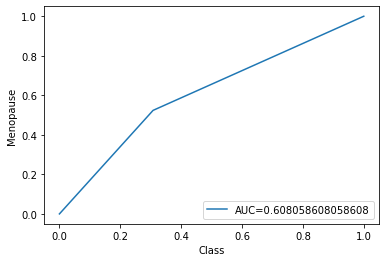

In [38]:
#define metrics
y_pred_proba = log_regression.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("Class")
plt.ylabel("Menopause")
plt.show()

In [28]:
#print(model.intercept_, model.coef_)

#### Recurrence class vs Irradiate

In [29]:
x1 = np.asarray(bc.Class).reshape(-1,1)
y1 = np.asarray(bc.irradiate)
#split the dataset into training (70%) and testing (30%) sets
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=0)

In [30]:
#instantiate the model
log_regression = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
log_regression.fit(x1_train,y1_train)

#use model to make predictions on test data
y_pred = log_regression.predict(x1_test)

In [31]:
print(log_regression.intercept_, log_regression.coef_)

[-1.3871269] [[0.79298663]]


In [33]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[65,  0],
       [21,  0]], dtype=int64)

In [35]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.7558139534883721


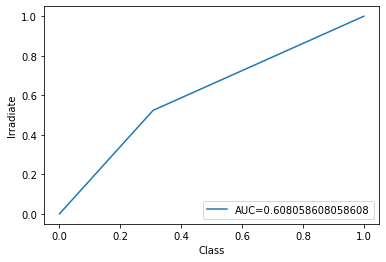

In [39]:
#define metrics
y_pred_proba = log_regression.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("Class")
plt.ylabel("Irradiate")
plt.show()

## Optimization <a id='optimization'></a>

In our decision theory part, we looked at women who's age vary from $20-59$ to determine if they should go to a doctor and get checked for breast cancer if they experience early menopause or any symptoms of it. After looking at the data set closesly, I notice that there is only one entry for a women who's age is between $20-29$.

### Optimize: recurrence vs menopause

#### Changing the test/train split

In [46]:
x1 = np.asarray(bc.Class).reshape(-1,1)
y1 = np.asarray(bc.Menopause)
#split the dataset into training (60%) and testing (40%) sets
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.4,random_state=0)

In [47]:
#instantiate the model
log_regression = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
log_regression.fit(x1_train,y1_train)

#use model to make predictions on test data
y_pred = log_regression.predict(x1_test)

In [48]:
print(log_regression.intercept_, log_regression.coef_)

[0.12105547] [[-0.07034709]]


In [49]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[ 0, 55],
       [ 0, 60]], dtype=int64)

In [50]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.5217391304347826


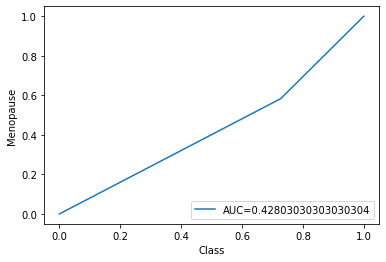

In [51]:
#define metrics
y_pred_proba = log_regression.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("Class")
plt.ylabel("Menopause")
plt.show()

#### Changing the random state

In [52]:
x1 = np.asarray(bc.Class).reshape(-1,1)
y1 = np.asarray(bc.Menopause)
#split the dataset into training (70%) and testing (30%) sets
#setting random_state = 2
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=2)

In [53]:
#instantiate the model
log_regression = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
log_regression.fit(x1_train,y1_train)

#use model to make predictions on test data
y_pred = log_regression.predict(x1_test)

In [54]:
print(log_regression.intercept_, log_regression.coef_)

[-0.02076036] [[0.26303305]]


In [55]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[29, 10],
       [34, 13]], dtype=int64)

In [56]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.4883720930232558


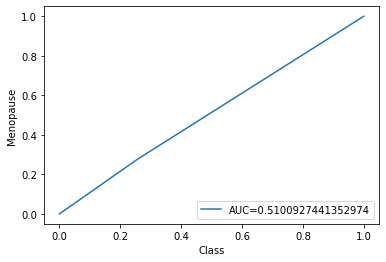

In [57]:
#define metrics
y_pred_proba = log_regression.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("Class")
plt.ylabel("Menopause")
plt.show()

### Optimize Recurrence vs Irradiate

#### Changing train/test split

In [58]:
x1 = np.asarray(bc.Class).reshape(-1,1)
y1 = np.asarray(bc.irradiate)
#split the dataset into training (80%) and testing (20%) sets
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [59]:
#instantiate the model
log_regression = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
log_regression.fit(x1_train,y1_train)

#use model to make predictions on test data
y_pred = log_regression.predict(x1_test)

In [60]:
print(log_regression.intercept_, log_regression.coef_)

[-1.33280559] [[0.68426717]]


In [61]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[45,  0],
       [13,  0]], dtype=int64)

In [62]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.7758620689655172


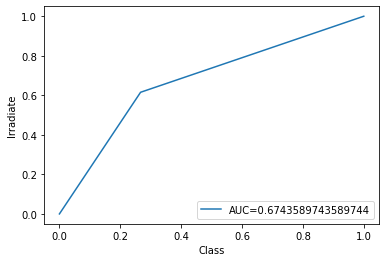

In [63]:
#define metrics
y_pred_proba = log_regression.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("Class")
plt.ylabel("Irradiate")
plt.show()

#### Changing the random state

In [64]:
x1 = np.asarray(bc.Class).reshape(-1,1)
y1 = np.asarray(bc.irradiate)
#split the dataset into training (70%) and testing (30%) sets
#setting random_state = 2
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=2)

In [65]:
#instantiate the model
log_regression = LogisticRegression(solver='liblinear', random_state=0)

#fit the model using the training data
log_regression.fit(x1_train,y1_train)

#use model to make predictions on test data
y_pred = log_regression.predict(x1_test)

In [66]:
print(log_regression.intercept_, log_regression.coef_)

[-1.40627006] [[0.75482567]]


In [67]:
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[65,  0],
       [21,  0]], dtype=int64)

In [68]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.7558139534883721


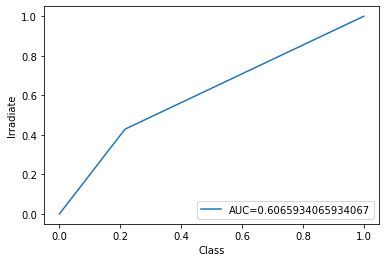

In [69]:
#define metrics
y_pred_proba = log_regression.predict_proba(x1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("Class")
plt.ylabel("Irradiate")
plt.show()